In [303]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (accuracy_score,log_loss,confusion_matrix)
import plotly.offline as py
import plotly.graph_objs as go



In [304]:
df=pd.read_csv(r"C:\Users\abc\Downloads\WA_Fn-UseC_-HR-Employee-Attrition.csv")
df.head()


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


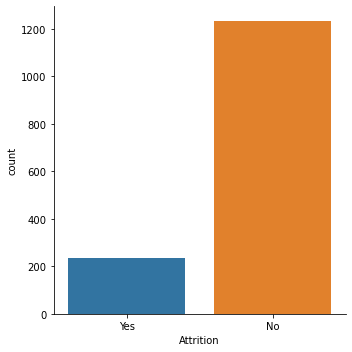

In [305]:
ax=sns.catplot(x='Attrition',kind="count",data=df)
plt.show()

In [306]:
df.isnull().sum()


Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [307]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [308]:
df_num=pd.DataFrame(data=df.select_dtypes(include="int64"))


In [309]:
df_obj=pd.DataFrame(data=df.select_dtypes(include="object"))


In [310]:
df_num.shape



(1470, 26)

In [311]:
df_obj.shape

(1470, 9)

<Figure size 1080x1080 with 0 Axes>

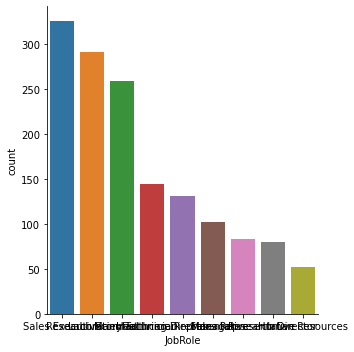

In [312]:
plt.figure(figsize=(15,15))
a=sns.catplot(x="JobRole",kind="count",data=df)
plt.show()


In [313]:
df_num.columns


Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [314]:
df_obj.columns


Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'Over18', 'OverTime'],
      dtype='object')

In [315]:
df_obj = df_obj.drop(['Attrition'],axis=1)

df_obj_encoded = pd.get_dummies('df_obj')


In [316]:
df_obj_encoded.head()


,df_obj
0,1


In [317]:
df_obj_encoded.shape

(1, 1)

In [318]:
df_obj

,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
0,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Y,Yes
1,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,Y,No
2,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Y,Yes
3,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Y,Yes
4,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No
...,...,...,...,...,...,...,...,...
1465,Travel_Frequently,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No
1466,Travel_Rarely,Research & Development,Medical,Male,Healthcare Representative,Married,Y,No
1467,Travel_Rarely,Research & Development,Life Sciences,Male,Manufacturing Director,Married,Y,Yes
1468,Travel_Frequently,Sales,Medical,Male,Sales Executive,Married,Y,No


In [319]:
df_obj_encoded


,df_obj
0,1


In [320]:
BusinessTravel=pd.get_dummies(df.BusinessTravel,drop_first=True)
Department=pd.get_dummies(df.Department,drop_first=True)
EducationField=BusinessTravel=pd.get_dummies(df.EducationField,drop_first=True)
JobRole=pd.get_dummies(df.JobRole,drop_first=True)
MaritalStatus	=pd.get_dummies(df.MaritalStatus	,drop_first=True)

In [321]:
df_obj=pd.concat([BusinessTravel,Department,EducationField,JobRole,MaritalStatus	,df_obj],axis=1)



In [322]:
df_obj.head()

,Life Sciences,Marketing,Medical,Other,Technical Degree,Research & Development,Sales,Life Sciences,Marketing,Medical,...,Married,Single,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
0,1,0,0,0,0,0,1,1,0,0,...,0,1,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Y,Yes
1,1,0,0,0,0,1,0,1,0,0,...,1,0,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,Y,No
2,0,0,0,1,0,1,0,0,0,0,...,0,1,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Y,Yes
3,1,0,0,0,0,1,0,1,0,0,...,1,0,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Y,Yes
4,0,0,1,0,0,1,0,0,0,1,...,1,0,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No


In [323]:
df_obj.drop(['BusinessTravel','Department','EducationField','JobRole','MaritalStatus'],axis=1,inplace=True)

In [324]:
df_obj.head()

,Life Sciences,Marketing,Medical,Other,Technical Degree,Research & Development,Sales,Life Sciences,Marketing,Medical,...,Manufacturing Director,Research Director,Research Scientist,Sales Executive,Sales Representative,Married,Single,Gender,Over18,OverTime
0,1,0,0,0,0,0,1,1,0,0,...,0,0,0,1,0,0,1,Female,Y,Yes
1,1,0,0,0,0,1,0,1,0,0,...,0,0,1,0,0,1,0,Male,Y,No
2,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,1,Male,Y,Yes
3,1,0,0,0,0,1,0,1,0,0,...,0,0,1,0,0,1,0,Female,Y,Yes
4,0,0,1,0,0,1,0,0,0,1,...,0,0,0,0,0,1,0,Male,Y,No


In [325]:
standard_scalar=StandardScaler()
df_num_scaled=standard_scalar.fit_transform(df_num)


In [326]:
df_num_scaled.shape



(1470, 26)

In [327]:
df_num_scaled


array([[ 0.4463504 ,  0.74252653, -1.01090934, ..., -0.0632959 ,
        -0.67914568,  0.24583399],
       [ 1.32236521, -1.2977746 , -0.14714972, ...,  0.76499762,
        -0.36871529,  0.80654148],
       [ 0.008343  ,  1.41436324, -0.88751511, ..., -1.16768726,
        -0.67914568, -1.15593471],
       ...,
       [-1.08667552, -1.60518328, -0.64072665, ..., -0.61549158,
        -0.67914568, -0.31487349],
       [ 1.32236521,  0.54667746, -0.88751511, ...,  0.48889978,
        -0.67914568,  1.08689522],
       [-0.32016256, -0.43256792, -0.14714972, ..., -0.33939374,
        -0.36871529, -0.59522723]])

In [328]:
df_obj.shape



(1470, 25)

In [329]:
df_num.shape


(1470, 26)

In [330]:
df_final=pd.concat([df_num,df_obj],axis=1)

In [331]:
map={'Female':1,"Male":0}
df_final['Gender']=df_final['Gender'].apply(lambda x:map[x])

In [332]:
map={'Y':1,"N":0}
df_final['Over18']=df_final['Over18'].apply(lambda x:map[x])

In [333]:
map={'Yes':1,"No":0}
df_final['OverTime']=df_final['OverTime'].apply(lambda x:map[x])

In [334]:
df_final.shape


(1470, 51)

In [335]:
df_final.head(200)


,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,Manufacturing Director,Research Director,Research Scientist,Sales Executive,Sales Representative,Married,Single,Gender,Over18,OverTime
0,41,1102,1,2,1,1,2,94,3,2,...,0,0,0,1,0,0,1,1,1,1
1,49,279,8,1,1,2,3,61,2,2,...,0,0,1,0,0,1,0,0,1,0
2,37,1373,2,2,1,4,4,92,2,1,...,0,0,0,0,0,0,1,0,1,1
3,33,1392,3,4,1,5,4,56,3,1,...,0,0,1,0,0,1,0,1,1,1
4,27,591,2,1,1,7,1,40,3,1,...,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,37,290,21,3,1,267,2,65,4,1,...,0,0,1,0,0,1,0,0,1,1
196,35,138,2,3,1,269,2,37,3,2,...,0,0,0,0,0,0,1,1,1,0
197,42,926,21,2,1,270,3,36,3,2,...,1,0,0,0,0,0,0,1,1,0
198,38,1261,2,4,1,271,4,88,3,2,...,1,0,0,0,0,1,0,0,1,0


In [336]:
df.columns
target=df['Attrition']
map={'Yes':1,"No":0}
target=target.apply(lambda x:map[x])




In [337]:
df_final['Gender']


0       1
1       0
2       0
3       1
4       0
       ..
1465    0
1466    0
1467    0
1468    0
1469    0
Name: Gender, Length: 1470, dtype: int64

In [338]:
target


0       1
1       0
2       1
3       0
4       0
       ..
1465    0
1466    0
1467    0
1468    0
1469    0
Name: Attrition, Length: 1470, dtype: int64

In [339]:
X=df_final
y=target

In [340]:
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.8,random_state=0)

In [341]:
X_train



,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,Manufacturing Director,Research Director,Research Scientist,Sales Executive,Sales Representative,Married,Single,Gender,Over18,OverTime
1374,58,605,21,3,1,1938,4,72,3,4,...,0,0,0,0,0,1,0,1,1,1
1092,45,950,28,3,1,1546,4,97,3,1,...,0,0,1,0,0,1,0,0,1,0
768,40,300,26,3,1,1066,3,74,3,2,...,0,0,0,1,0,1,0,0,1,0
569,36,1434,8,4,1,789,1,76,2,3,...,0,0,0,1,0,0,1,0,1,0
911,25,599,24,1,1,1273,3,73,1,1,...,0,0,0,0,1,0,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,34,1333,10,4,1,1055,3,87,3,1,...,0,0,0,0,1,1,0,1,1,1
835,35,528,8,4,1,1164,3,100,3,1,...,0,0,0,0,0,0,1,0,1,0
1216,43,1179,2,3,1,1706,4,73,3,2,...,0,0,0,1,0,1,0,0,1,1
559,38,268,2,5,1,773,4,92,3,1,...,0,0,1,0,0,1,0,0,1,1


In [342]:
X_test.shape



(294, 51)

In [343]:
y_train.shape


(1176,)

In [344]:
y_test.shape



(294,)

In [345]:
adaboost=AdaBoostClassifier(n_estimators=200,random_state=1)

In [346]:
adaboost.fit(X_train,y_train)

AdaBoostClassifier(n_estimators=200, random_state=1)

In [347]:
X_train


,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,Manufacturing Director,Research Director,Research Scientist,Sales Executive,Sales Representative,Married,Single,Gender,Over18,OverTime
1374,58,605,21,3,1,1938,4,72,3,4,...,0,0,0,0,0,1,0,1,1,1
1092,45,950,28,3,1,1546,4,97,3,1,...,0,0,1,0,0,1,0,0,1,0
768,40,300,26,3,1,1066,3,74,3,2,...,0,0,0,1,0,1,0,0,1,0
569,36,1434,8,4,1,789,1,76,2,3,...,0,0,0,1,0,0,1,0,1,0
911,25,599,24,1,1,1273,3,73,1,1,...,0,0,0,0,1,0,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,34,1333,10,4,1,1055,3,87,3,1,...,0,0,0,0,1,1,0,1,1,1
835,35,528,8,4,1,1164,3,100,3,1,...,0,0,0,0,0,0,1,0,1,0
1216,43,1179,2,3,1,1706,4,73,3,2,...,0,0,0,1,0,1,0,0,1,1
559,38,268,2,5,1,773,4,92,3,1,...,0,0,1,0,0,1,0,0,1,1


In [349]:
y_pred=adaboost.predict(X_test)

In [350]:
accuracy_score(y_test,y_pred)


0.8469387755102041

In [351]:
confusion_matrix(y_test,y_pred)


array([[236,   9],
       [ 36,  13]], dtype=int64)